In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/Fangda2023/schulich_data_science/main/data_sets/hotel_booking.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data Cleaning

In [29]:
# Handling missing values in the 'children' column by filling with 0
df['children'].fillna(0, inplace=True)

# Handling missing values in the 'country' column by imputing with the most frequent country
most_frequent_country = df['country'].mode().iloc[0]
df['country'].fillna(most_frequent_country, inplace=True)
# df.drop(columns=['country'], inplace=True)

In [30]:
#These four information about customers are of no value to our analysis, so they are deleted in the step of data cleaning.
drop_cols = ["name",
             "email",
             "phone-number",
             "credit_card",
            ]
df = df.drop(columns=drop_cols)

In [31]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [32]:
df['is_canceled'] = df['is_canceled'].astype('object')

In [33]:
df['hotel'].value_counts(normalize=True) * 100


City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

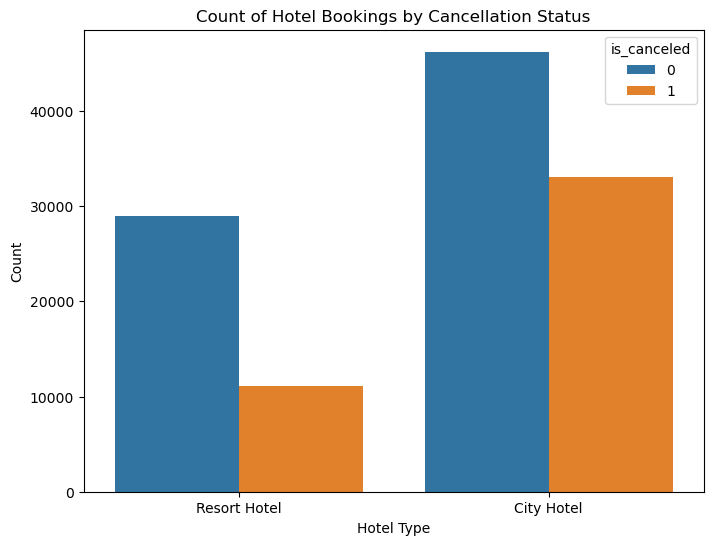

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Count of Hotel Bookings by Cancellation Status')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

In [35]:
# Find the top 10 countries with the highest hotel booking
most_countries = df['country'].value_counts().nlargest(10)
print("10 countries with the most bookings:")
print(most_countries)

10 countries with the most bookings:
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64


In [36]:
# Find the top 10 countries with the highest hotel booking with the cancelition
df_cancel = df[df['is_canceled'] == 1]
df_cancel['country'].value_counts()[:10]

PRT    27586
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: country, dtype: int64

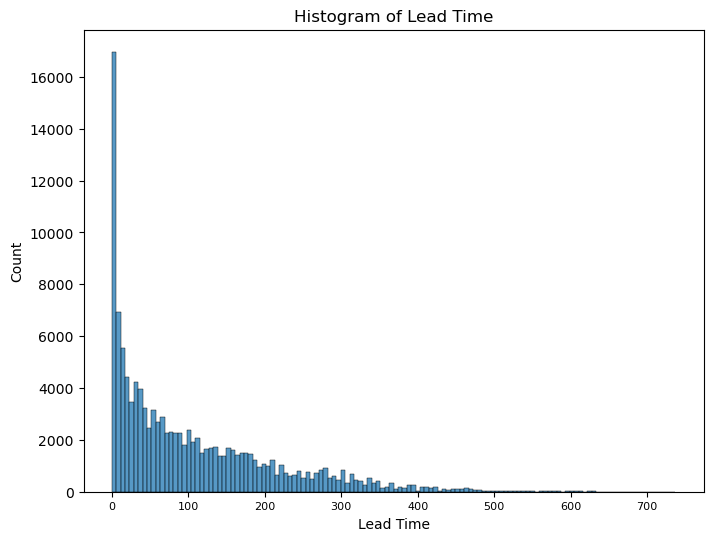

In [37]:
plt.figure(figsize=(8, 6))
hist_plot = sns.histplot(df['lead_time'])
plt.title('Histogram of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Count')
hist_plot.tick_params(axis='x', labelsize=8)
plt.show()

##### Most of customers would like book the reservation in advance few days, the lead time trend decreasing with time.

/var/folders/zj/_4td97xs5m5_42chzkdpgsch0000gn/T/ipykernel_47492/2901465073.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


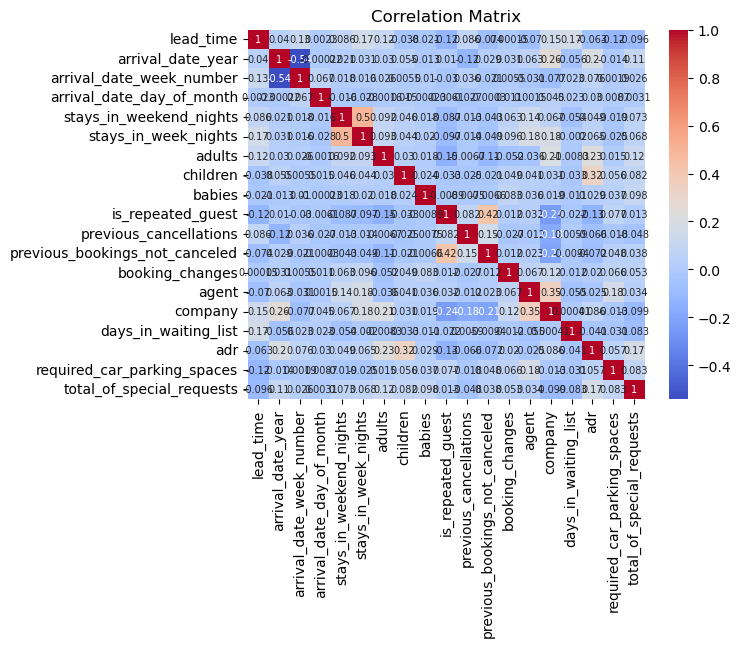

In [38]:
corr = df.corr()
heatmap_plot = sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
            cmap='coolwarm',
            annot_kws={'size': 7})  
plt.title('Correlation Matrix')
plt.show()

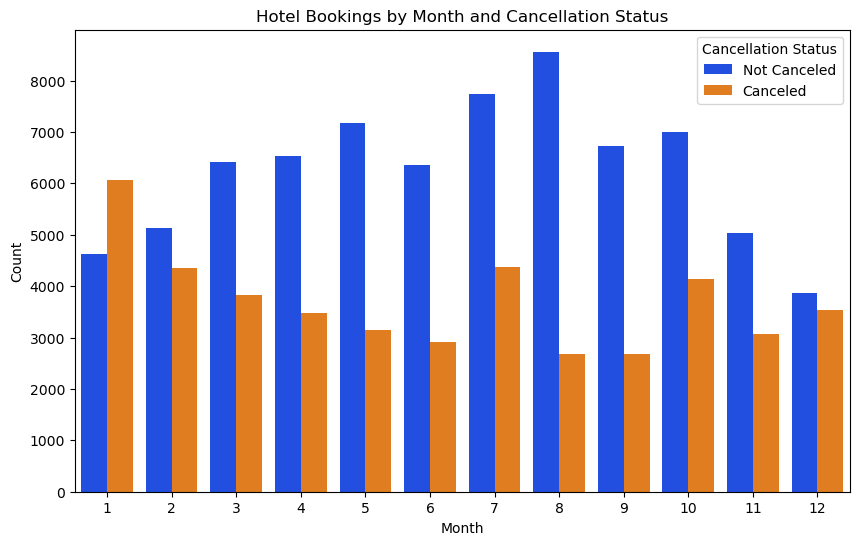

In [39]:
df['month'] = pd.to_datetime(df['reservation_status_date']).dt.month
plt.figure(figsize=(10, 6))
countplot = sns.countplot(x='month', hue='is_canceled', data=df, palette='bright')
plt.title('Hotel Bookings by Month and Cancellation Status')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

##### Only in January the cancelition count greater then no cacelition count. And on August there have the booking count is the largest.

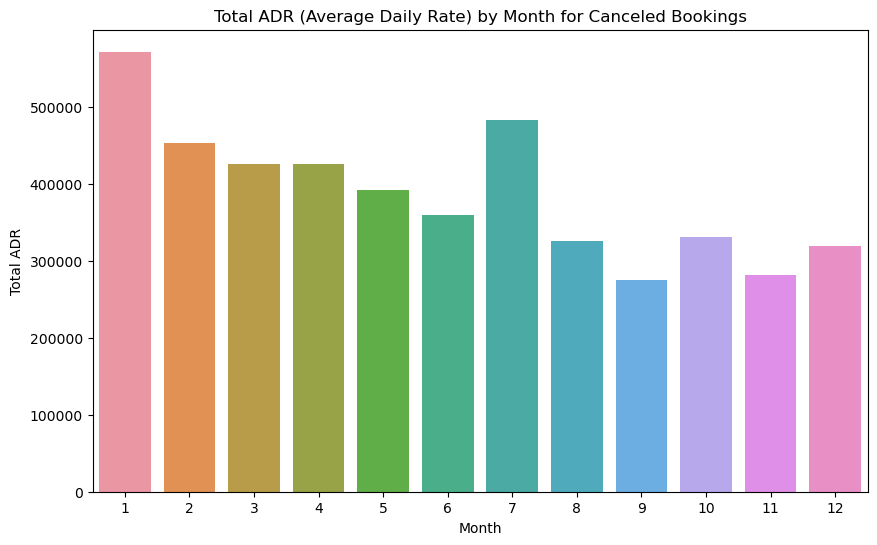

In [40]:
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='month', y='adr', data=df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.title('Total ADR (Average Daily Rate) by Month for Canceled Bookings')
plt.xlabel('Month')
plt.ylabel('Total ADR')
plt.show()

##### According to the plot, it shows the number of the cancellations for each month. As we can see, the relatively high average daily rate both in January and July; but in August, September, and November, the average daily rates are relatively low.

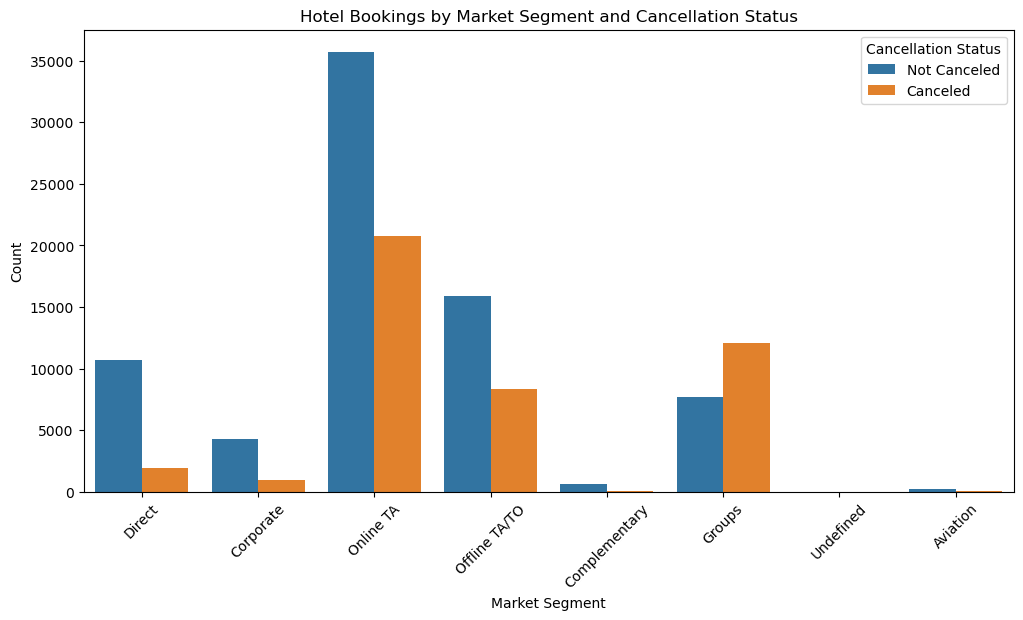

In [41]:
plt.figure(figsize=(12, 6))
countplot = sns.countplot(x='market_segment', data=df, hue='is_canceled')
plt.title('Hotel Bookings by Market Segment and Cancellation Status')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

##### The most of custome's market segment is online TA.

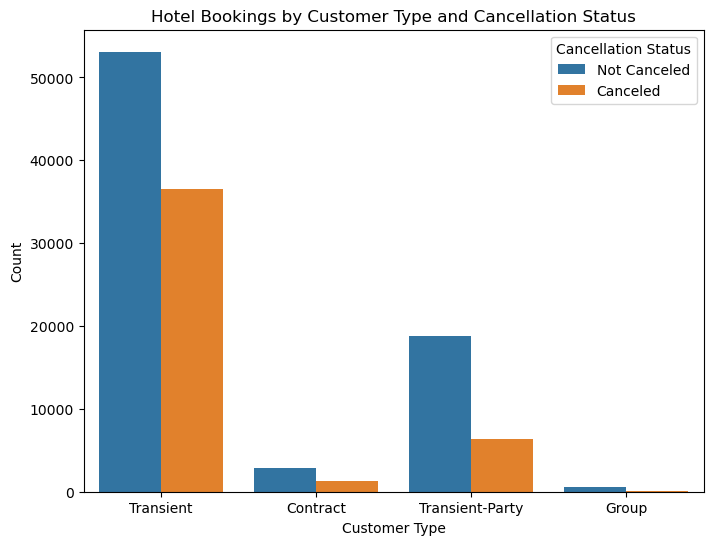

In [42]:
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='customer_type', data=df, hue='is_canceled')
plt.title('Hotel Bookings by Customer Type and Cancellation Status')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()


##### The cancellation status for different customer types are different. Transient has the highest count for both canceled and not canceled status, and the group has the lowest count. Overall, the number of not canceled status are higher than canceled status for every customer types.

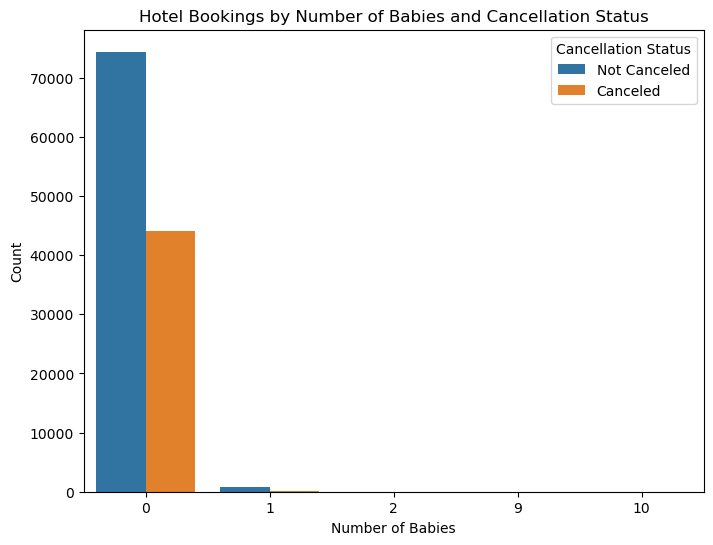

In [43]:
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='babies', data=df, hue='is_canceled')
plt.title('Hotel Bookings by Number of Babies and Cancellation Status')
plt.xlabel('Number of Babies')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()


##### Number of babies will not affect the cancellation status.

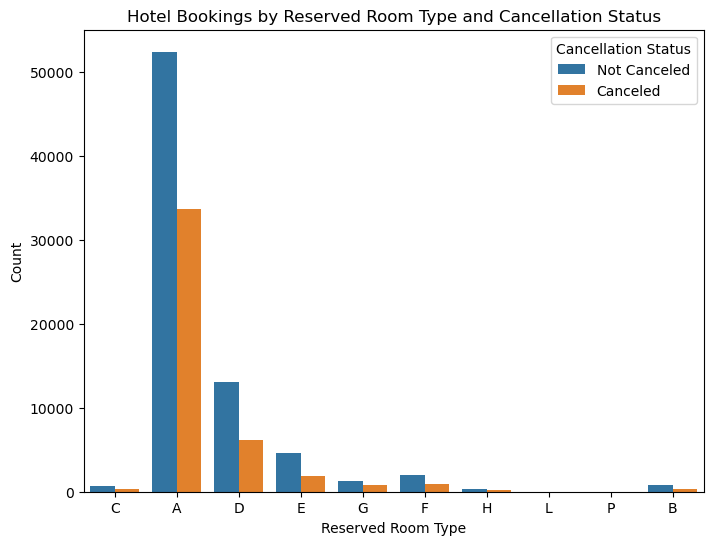

In [44]:
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='reserved_room_type', data=df, hue='is_canceled')
plt.title('Hotel Bookings by Reserved Room Type and Cancellation Status')
plt.xlabel('Reserved Room Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

##### Type A room has the highest count in both not canceled status and canceled status, it is the mpst popular room type.

### Feature Engineering

In [45]:
df['arrival_date_month'] = pd.to_datetime(df.arrival_date_month, format='%B').dt.month
df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']] = df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str)
df['arrive_date'] = pd.to_datetime(df['arrival_date_year'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'])

In [46]:
def bin_lead_time(lead_time):
    if lead_time <= 1:
        return '0-1'
    elif lead_time <= 7:
        return '1-7'
    elif lead_time <= 30:
        return '7-30'
    elif lead_time <= 60:
        return '30-60'
    elif lead_time <= 90:
        return '60-90'
    elif lead_time <= 120:
        return '90-120'
    elif lead_time <= 360:
        return '120-360'
    else:
        return '360 or more'

df['lead_time'] = df['lead_time'].apply(bin_lead_time)

In [47]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month,arrive_date
0,Resort Hotel,0,120-360,2015,7,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
1,Resort Hotel,0,360 or more,2015,7,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
2,Resort Hotel,0,1-7,2015,7,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
3,Resort Hotel,0,7-30,2015,7,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
4,Resort Hotel,0,7-30,2015,7,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01


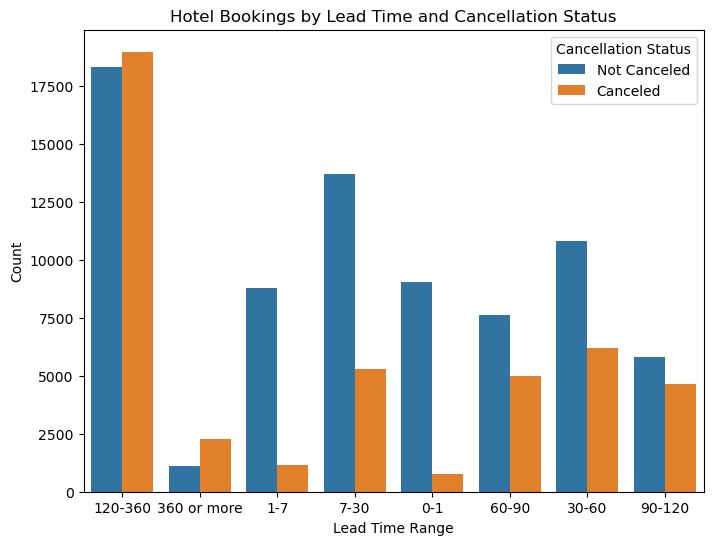

In [48]:
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x='lead_time', data=df, hue='is_canceled')
plt.title('Hotel Bookings by Lead Time and Cancellation Status')
plt.xlabel('Lead Time Range')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()

##### When people in advanve 120-360 days booking resevesion, the cancelition count is greater than no cancelition count.

In [49]:
# Encoding Categorical Variables
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [50]:
# Date Features
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

In [52]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = ['arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                  'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
                  'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                  'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'year', 'month', 'day']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [53]:
# Split data into features and target
categorical_features = ['arrival_date_month', 'meal', 'country', 'distribution_channel', 'deposit_type', 'customer_type']
numerical_features = ['arrival_date_year', 'arrival_date_week_number', 'adults', 'children', 'babies', 'days_in_waiting_list', 'adr', 'total_of_special_requests']
target = 'is_canceled'

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features], df[target],
                                                    test_size = 0.3, random_state = 1234)

In [55]:
X_train

,arrival_date_month,meal,country,distribution_channel,deposit_type,customer_type,arrival_date_year,arrival_date_week_number,adults,children,babies,days_in_waiting_list,adr,total_of_special_requests
73639,10,3,85,3,0,2,1.192195,0.575875,0.247897,-0.260659,-0.081579,-0.131924,-0.056022,1.802026
83055,0,0,135,3,0,3,-0.221286,-1.776187,0.247897,-0.260659,-0.081579,2.312002,-0.986060,0.540666
276,9,0,59,3,0,2,-1.634768,0.061361,0.247897,-0.260659,10.181591,-0.131924,0.173519,-0.720694
2665,1,0,135,3,0,2,-1.634768,1.163891,0.247897,-0.260659,-0.081579,-0.131924,-0.709028,0.540666
105646,4,0,56,3,0,2,1.192195,-1.555681,0.247897,-0.260659,-0.081579,-0.131924,-0.147839,-0.720694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89460,7,0,56,3,0,3,-0.221286,-0.453152,0.247897,-0.260659,-0.081579,-0.131924,-0.728816,-0.720694
60620,2,0,135,3,1,2,-0.221286,1.457898,0.247897,-0.260659,-0.081579,-0.131924,-0.772349,-0.720694
34086,5,0,123,3,0,2,1.192195,-1.261674,0.247897,-0.260659,-0.081579,-0.131924,-0.699134,0.540666
58067,1,0,135,3,1,2,-0.221286,1.016887,0.247897,-0.260659,-0.081579,-0.131924,-0.234115,-0.720694


In [56]:
X_test

,arrival_date_month,meal,country,distribution_channel,deposit_type,customer_type,arrival_date_year,arrival_date_week_number,adults,children,babies,days_in_waiting_list,adr,total_of_special_requests
107255,5,0,59,3,0,2,1.192195,-1.261674,0.247897,-0.260659,-0.081579,-0.131924,-0.030298,4.324746
110092,6,0,59,3,0,2,1.192195,-0.820662,0.247897,-0.260659,-0.081579,-0.131924,-0.287147,0.540666
110457,6,0,135,0,0,2,1.192195,-0.747160,-1.478447,-0.260659,-0.081579,-0.131924,-0.709028,-0.720694
13366,10,0,135,3,0,2,1.192195,0.355369,1.974242,2.248414,-0.081579,-0.131924,4.712895,-0.720694
36222,7,0,25,3,0,2,1.192195,-0.600156,0.247897,-0.260659,-0.081579,-0.131924,0.526538,0.540666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72092,9,0,15,3,0,2,1.192195,0.134863,1.974242,-0.260659,-0.081579,-0.131924,0.412954,-0.720694
60284,2,0,135,3,1,2,-0.221286,1.384396,0.247897,-0.260659,-0.081579,-0.131924,-0.036234,-0.720694
16962,11,2,56,3,0,3,-1.634768,0.796381,0.247897,-0.260659,-0.081579,-0.131924,-0.465635,0.540666
16916,11,0,59,3,0,2,-1.634768,0.722879,0.247897,-0.260659,-0.081579,-0.131924,-0.929862,-0.720694


In [57]:
y_train


73639     1
83055     0
276       0
2665      0
105646    0
         ..
89460     0
60620     1
34086     0
58067     1
92975     0
Name: is_canceled, Length: 83573, dtype: object

In [58]:
y_test

107255    0
110092    0
110457    0
13366     1
36222     0
         ..
72092     1
60284     1
16962     0
16916     0
33758     0
Name: is_canceled, Length: 35817, dtype: object

#### Model Development

##### Predicting hotel booking cancellations is a classification problem because the predicted outcome is binary: canceled or not canceled. Therefore, we need to use classification algorithms while building the model.

##### We will implement the following models:

1. Logistic Regression: Logistic regression is a commonly used binary classification algorithm. It can predict the probability of an event by using a logistic function

2. Decision Trees: Decision Trees predict the class of outcomes by creating a tree of decision rules.

3. Support Vector Machines (SVMs): SVMs are an effective binary classification algorithm that is particularly suited to small to medium sized complex datasets, and therefore well suited to our dataset.

4. K-Nearest Neighbors (KNN): Uses the similarity of bookings to predict whether they will be canceled.

5. Random Forest: Evaluates whether a reservation is likely to be canceled by combining predictions from multiple decision trees.

6. Gradient Boosting: Iteratively corrects prediction errors to incrementally improve the accuracy of predicting hotel booking cancellations.

##### 1. Logistic Regression

In [59]:
# Build a Logistic Regression Model to study the relationship between the features and the target variable
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
# Create a Logistic Regression object
log_reg = LogisticRegression()

In [62]:
# Train the model using the training sets
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Fit the model
log_reg.fit(X_train, y_train)

/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
# Print out the coefficients of the model
print("Coefficients of the model: ", log_reg.coef_)
print("Intercept of the model: ", log_reg.intercept_)
print("Features: ", X_train.columns)

Coefficients of the model:  [[-0.01089359  0.03498749  0.00919299  0.43046852  4.72262158 -0.29732604
   0.20947417  0.08610999  0.18581949  0.05047276 -0.00963626 -0.01760525
   0.19823632 -0.47184535]]
Intercept of the model:  [-2.21990652]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


In [64]:
# Print out each of the coefficients and match them to the features.
for i in range(len(X_train.columns)):
    print("Coefficient of {} is {}".format(X_train.columns[i], log_reg.coef_[0][i]))

Coefficient of arrival_date_month is -0.01089359090957272
Coefficient of meal is 0.03498748689870651
Coefficient of country is 0.009192987189706014
Coefficient of distribution_channel is 0.4304685188803922
Coefficient of deposit_type is 4.722621584338482
Coefficient of customer_type is -0.29732604087668923
Coefficient of arrival_date_year is 0.20947416718511797
Coefficient of arrival_date_week_number is 0.08610998593246061
Coefficient of adults is 0.18581949183960592
Coefficient of children is 0.0504727584687894
Coefficient of babies is -0.009636257003908398
Coefficient of days_in_waiting_list is -0.017605249352254566
Coefficient of adr is 0.1982363215321821
Coefficient of total_of_special_requests is -0.4718453519577952


- The coefficients of the model can be used to interpret the importance of each feature.
- The larger the absolute value of the coefficient, the more important the feature is.
- The sign of the coefficient indicates the direction of the relationship between the feature and the target variable.
- A positive coefficient indicates a positive relationship, while a negative coefficient indicates a negative relationship.

In [65]:
# In our case, how many coefficients are there?
print("Number of coefficients: ", len(log_reg.coef_[0]))

Number of coefficients:  14


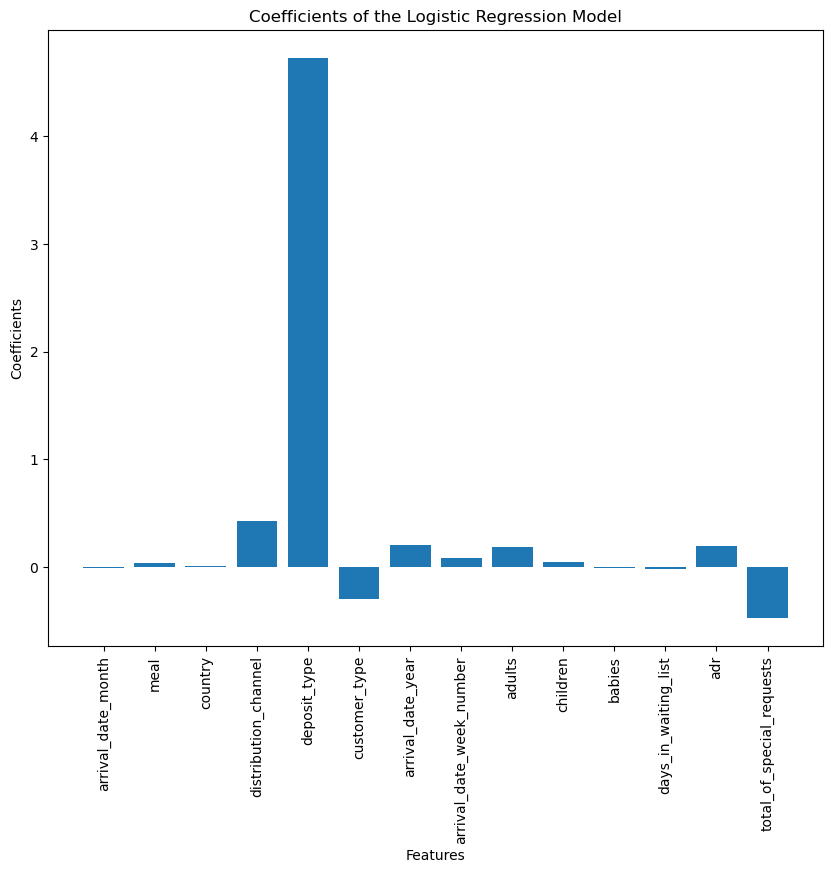

In [66]:
# Make an explanatory plot of the coefficients
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, log_reg.coef_[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Coefficients of the Logistic Regression Model')
plt.show()

In [67]:
# Make predictions using the testing set
y_pred = log_reg.predict(X_test)

In [68]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7555071614038027
Confusion Matrix:
[[21326  1109]
 [ 7648  5734]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     22435
           1       0.84      0.43      0.57     13382

    accuracy                           0.76     35817
   macro avg       0.79      0.69      0.70     35817
weighted avg       0.77      0.76      0.73     35817



##### Using hyperparameter tuning and cross-validation techniques to improve the logistic regression model we built above

In [69]:
# Using hyperparameter tuning and cross-validation techniques to improve the logistic regression model we built above
from sklearn.model_selection import GridSearchCV

In [70]:
# Create a Logistic Regression object
log_reg = LogisticRegression()

In [71]:
# Create a dictionary of hyperparameters to search
hyperparameters = {'penalty': ['l1', 'l2'],
                     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# Create grid search
gridsearch = GridSearchCV(log_reg, hyperparameters, cv=5, verbose=0)

In [72]:
# Fit grid search
best_model = gridsearch.fit(X_train, y_train)

/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jiawenli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

In [73]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 100


In [74]:
# Make predictions using the testing set
y_pred = best_model.predict(X_test)

In [75]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7549766870480498
Confusion Matrix:
[[21338  1097]
 [ 7679  5703]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83     22435
           1       0.84      0.43      0.57     13382

    accuracy                           0.75     35817
   macro avg       0.79      0.69      0.70     35817
weighted avg       0.77      0.75      0.73     35817



In [76]:
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  21338
False Positives:  1097
False Negatives:  7679
True Positives:  5703


Determine whether the model is good enough to be deployed?

Then We need to calculate accuracy, precision, recall, sensitivity, and F1 score
- Accuracy = (TP + TN) / (TP + TN + FP + FN)
- Precision = TP / (TP + FP)
- Recall = TP / (TP + FN)
- Sensitivity = TP / (TP + FN)
- F1 score = 2 * Precision * Recall / (Precision + Recall)

In [77]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.7549766870480498
Precision:  0.8386764705882352
Recall:  0.4261694813929159
Sensitivity:  0.4261694813929159
F1 Score:  0.5651570706570211


In our case, we want to predict whether a customer will cancel the booking or not.
- If we predict that a customer will cancel the booking, but the customer actually does not cancel the booking, then we lose money. (FP)
- If we predict that a customer will not cancel the booking, but the customer actually cancels the booking, then we lose the opportunity to sell the room to another customer. (FN)

In our case, just to make it clear:
- TP means that the model correctly predicted that the booking was canceled when it actually was canceled.
- FP means that the model incorrectly predicted that the booking was canceled when it actually was not canceled.
- TN means that the model correctly predicted that the booking was not canceled when it actually was not canceled.
- FN means that the model incorrectly predicted that the booking was not canceled when it actually was canceled.

In our case, we want to minimize the number of False Positives (FP) and False Negatives (FN).
Therefore, we should assess the sensitivity of the model.

Why do we want to minimize the false negatives?
- False negatives are the cases where the model predicts the negative class when it should have predicted the positive class.
- In our case, a false negative is when the model predicts that a booking will not be canceled when it actually will be canceled.

This is a problem because the hotel will not be prepared for the cancellation and will not be able to fill the room with another booking.
This will result in a loss of revenue for the hotel.

Our sensitivity is 0.426, which is relatively low.
So, we can say that our model is not good enough.
Because it means that our model can correctly predict 42.6% of the customers who will cancel the booking.

In [78]:
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score

In [79]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]

In [80]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

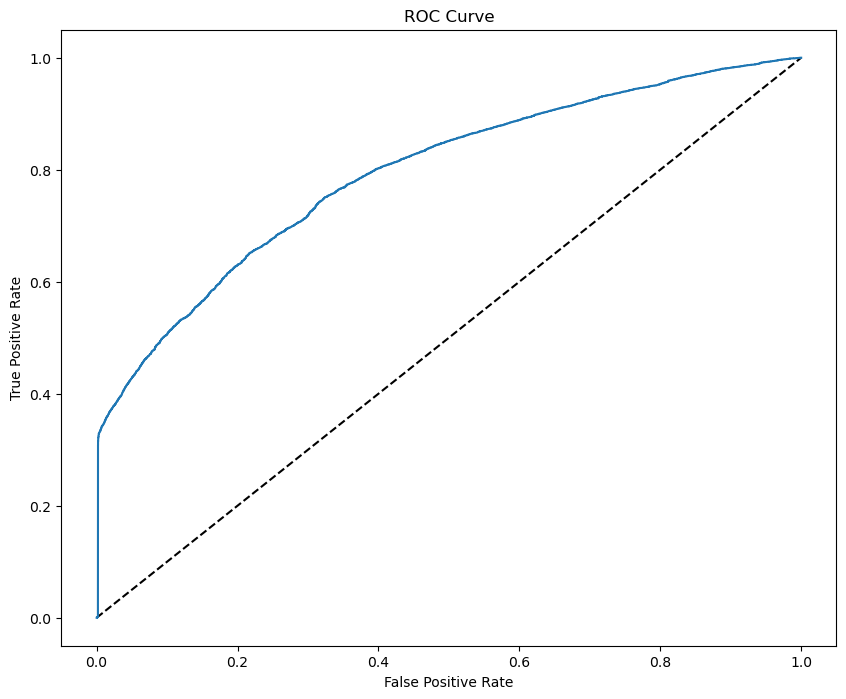

In [81]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [82]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.7932484574827621


How to assess AUC score?
- AUC score is a measure of how well the model is able to distinguish between the classes.
- AUC score of 0.5 means that the model is not able to distinguish between the classes.
- AUC score of 1 means that the model is able to perfectly distinguish between the classes.

AUC score of 0.79 indicates that the model is pretty good at distinguishing between positive and negative classes.

In our case, the positive class is 'is_canceled' = 1, and the negative class is 'is_canceled' = 0.
AUC score of 0.79 indicates that the model is very good at distinguishing between canceled and not canceled bookings.

Note: 
- AUC 0f 0.79 does not say anything in terms of predicting whether a booking will be canceled or not.
- AUC score of 0.79 only indicates that the model is very good at distinguishing between canceled and not canceled bookings.

----------------

#### Key insights from our logistic regression model:

1. Accuracy: Accuracy is the percentage of outcomes (both true examples and true counterexamples) that the model predicts correctly out of all cases. In our case, an accuracy of 0.75 means that the model predicts correctly 75% of the time.

2. Precision: Precision is the percentage of true positive cases out of the sample predicted to be positive cases (in this case, canceled bookings). In our case, a precision of 0.826 means that 82.6% of the cases predicted by the model to be canceled are actually canceled.

3. Recall: Recall is the percentage of true positive cases (in this case, canceled bookings) that were correctly predicted. In our case, a recall of 0.426 means that only 42.6% of the actual cancelations were correctly predicted by the model.

4. Sensitivity: Sensitivity is actually recall, so in our case a sensitivity of 42.6 could mean a recall of 42.6%.

5. F1 Score (F1 value): The F1 value is the harmonic mean of precision and recall, in order to find a balance between the two. In our case, an F1 value of 0.56 means that the model achieves a better balance between precision and recall.

These metrics tell us how well the model is performing in predicting canceled bookings. 
- The model has a high precision rate, meaning that the model tends to predict correctly when predicting canceled bookings. 
- However, the model's recall is low, meaning that a large proportion of actual cancellations are not predicted by the model. 
- The F1 value indicates how well the model balances precision and recall, and a value of 0.56 means that there is room for improvement in the model's balance between the two.

-------------

##### 2. Decision Trees

In [83]:
# Build a Decision Tree Model to study the relationship between the features and the target variable
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Create a Decision Tree object
dt = DecisionTreeClassifier()

In [85]:
# Train the model using the training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
# Make predictions using the testing set
y_pred = dt.predict(X_test)

In [87]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8082753999497445
Confusion Matrix:
[[18995  3440]
 [ 3427  9955]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22435
           1       0.74      0.74      0.74     13382

    accuracy                           0.81     35817
   macro avg       0.80      0.80      0.80     35817
weighted avg       0.81      0.81      0.81     35817



In [88]:
# How do I know which features are important in the Decision Tree model?
# Print out the feature importances
print("Feature Importances: ", dt.feature_importances_)
print("Features: ", X_train.columns)

Feature Importances:  [0.03784271 0.02845483 0.10086735 0.0385822  0.2448898  0.03682456
 0.03901309 0.13684472 0.02895664 0.0124727  0.00215545 0.00322258
 0.25173351 0.03813987]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


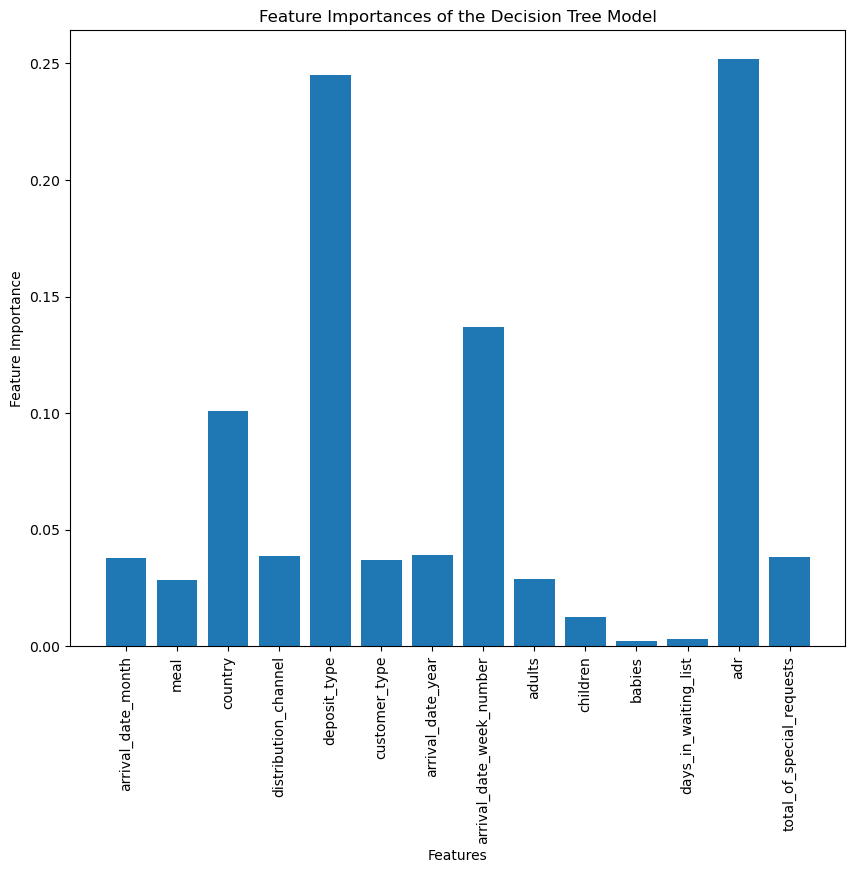

In [89]:
# Make an explanatory plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, dt.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree Model')
plt.show()

High feature importance does not necessarily mean that the feature is important for prediction.

It only means that the feature is important for the Decision Tree model to split the data.

For example, if a feature has a high feature importance, but it is not important for prediction,
then we can remove the feature from the model without affecting the performance of the model.

In our case, we can remove the 'arrival_date_year' feature from the model without affecting the performance of the model.

In [90]:
# Is our decision tree better than our logistic regression?
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  18995
False Positives:  3440
False Negatives:  3427
True Positives:  9955


In [91]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.8082753999497445
Precision:  0.7431877566256065
Recall:  0.7439097294873711
Sensitivity:  0.7439097294873711
F1 Score:  0.7435485678007245


In [92]:
# Does this mean that our decision tree is better than our logistic regression?
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = dt.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

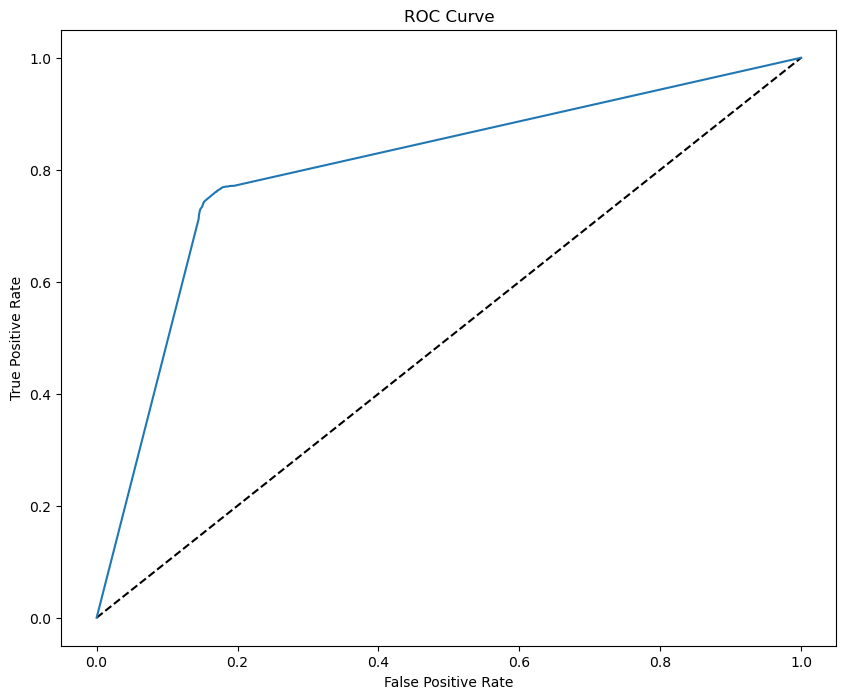

In [93]:
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [94]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.8025002833706448


In [95]:
# Using hyperparameter tuning and cross-validation techniques to improve the decision tree model we built above
from sklearn.model_selection import GridSearchCV

In [96]:
# Create a Decision Tree object
dt = DecisionTreeClassifier()
# Create a dictionary of hyperparameters to search
hyperparameters = {'criterion': ['gini', 'entropy'],
                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Create grid search
gridsearch = GridSearchCV(dt, hyperparameters, cv=5, verbose=0)

In [97]:
# Fit grid search
best_model = gridsearch.fit(X_train, y_train)
# View best hyperparameters
print('Best Criterion:', best_model.best_estimator_.get_params()['criterion'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', best_model.best_estimator_.get_params()['min_samples_split'])

Best Criterion: gini
Best max_depth: 10
Best min_samples_split: 4


In [98]:
# Make predictions using the testing set
y_pred = best_model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.7988664600608649
Confusion Matrix:
[[19959  2476]
 [ 4728  8654]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85     22435
           1       0.78      0.65      0.71     13382

    accuracy                           0.80     35817
   macro avg       0.79      0.77      0.78     35817
weighted avg       0.80      0.80      0.79     35817

True Negatives:  19959
False Positives:  2476
False Negatives:  4728
True Positives:  8654
Accuracy:  0.7988664600608649
Precision:  0.7775381850853549
Recall:  0.6466895830219698
Sensitivity:  0.6466895830219698
F1 Score:  0.7061031331592689


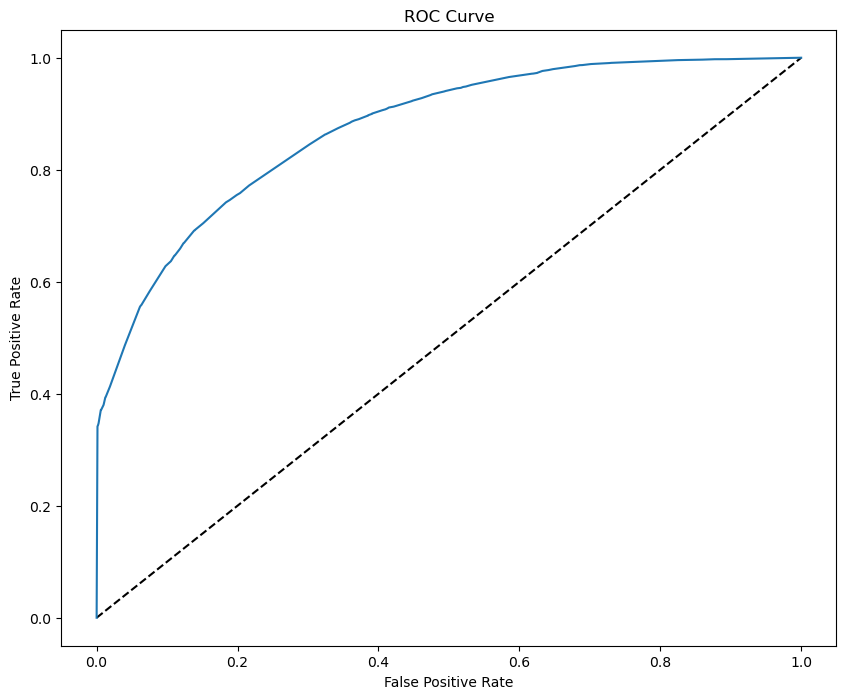

AUC:  0.8727987580121946


In [99]:
# Is this decision tree better than the previous one?
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

After Using hyperparameter tuning and cross-validation techniques, we can see that the ROC curve performs better, and the AUC score improves from 0.80 to 0.87.

In predicting the cancellation of a hotel booking, a "positive example" may indicate that the booking will be canceled, while a "negative example" indicates that the booking will not be canceled. Our model generates a prediction score for each booking that indicates the likelihood that the booking will be canceled.

The ROC curve here depicts how the proportion of true instances (actual cancellations that are predicted to be canceled) and false positive instances (actual non-cancellations that are predicted to be canceled) identified by the model changes as we change the threshold at which the model predicts that the booking will be canceled. Ideally, we would like the model to maximize the true cases while minimizing the false positive cases, so that the model's performance on the ROC curve would be closer to the upper left corner.

The AUC score here represents the area under the ROC curve, that is, the ability of the model to correctly predict whether a reservation will be canceled or not for all possible thresholds. the higher the AUC score, the better the predictive performance of the model. the AUC score ranges from 0.5 (which is equivalent to a random guess) to 1 (which is a perfect prediction).

Our AUC score improves from 0.80 to 0.87. meaning that our model's performance in predicting whether a hotel reservation will be canceled or not is improved. The ability of the model to correctly distinguish between a booking being canceled and not canceled improves in all possible scenarios where the threshold changes.

-----------------

#### Key insights from the Decision Tree Model:

1. Accuracy: 0.798 means that the model can correctly predict whether a reservation will be canceled about 79.8% of the time. Accuracy is a good place to start in evaluating a model, but is not fully representative of the model's performance, especially if the data is unbalanced.

2. Precision: 0.777 means that about 77.7% of all cases predicted by the model as "canceled booking" were actually "canceled bookings". This is a pretty good precision rate, and indicates that the model is highly reliable in predicting cancellations.

3. Recall/Sensitivity: 0.646 means that the model correctly predicted 64.6% of all actual "canceled reservations". This recall indicates that although the model may miss some actual cancellations in some cases, it is still able to capture most of them.

4. F1 Score (F1 value): The F1 value of 0.706 is the reconciled average of the precision and recall rates to find a balance between the two. an F1 value of 0.706 indicates that the model has achieved a relatively good balance between precision and recall.

Overall, the performance of this decision tree model is quite good with high accuracy and reliability. However, we can still make further improvements to increase the recall of the model in order to capture more actual canceled bookings.

#### It's worth pointing out:
A prescision of 0.777 means that about 77.7% of all bookings predicted by the model as "canceled" were actually canceled. This is a very high precision rate and shows that the model is very reliable in predicting canceled bookings.

In other words, if our model predicts that a reservation will be canceled, there is about a 78% probability that the reservation will actually be canceled. This is very useful for hotel managers as they can rely on this model to predict and manage booking cancellations to manage resources and optimize operations more efficiently.

--------------

#### Compare Logistic regression with Decision Tree

Logistic regression model:
- Accuracy: 0.75
- Precision: 0.83
- Recall: 0.43
- F1 Score: 0.56

Decision Tree Model:
- Accuracy: 0.798
- Precision: 0.777
- Recall: 0.646
- F1 Score: 0.706

In terms of accuracy, the decision tree model (0.798) performs better than the logistic regression model (0.75).

In terms of prescision, the Logistic regression model (0.83) performs slightly better than the decision tree model (0.777).

In terms of recall, the decision tree model (0.646) performs better than the logistic regression model (0.43).

In terms of F1 value, the decision tree model (0.706) also performs better than the Logistic regression model (0.56).

##### In terms of accuracy, the logistic regression model performed only slightly better (0.83) than the decision tree model (0.777). In other words, the logistic regression model has a slightly higher probability of correctly predicting a situation where the prediction is a "canceled reservation" (i.e., a positive case).

##### The Decision Tree Model outperforms the Logistic Regression Model (0.43) completely in the assessment of recall (0.646). In other words, the decision tree model correctly identifies a higher percentage of all real "canceled reservations" (i.e., positive cases).

##### Thus, overall, the decision tree model seems to perform better than the Logistic regression model in this case because of its higher accuracy, recall and F1 value. 

However, which model is more suitable also depends on your specific business needs. For example, if you're more concerned about avoiding incorrectly predicting canceled bookings (i.e., you'd prefer to increase the precision rate), then Logistic Regression might be better. And if you want to capture more actual canceled bookings (i.e., you'd prefer to improve recall), then Decision Tree might be better.

--------------

##### 3. Support Vector Machines

In [100]:
# Build a support vector machine model to study the relationship between the features and the target variable to predict the cancellation of hotel bookings
from sklearn.svm import SVC
# Create a SVC object
svc = SVC()
# Train the model using the training sets
svc.fit(X_train, y_train)

SVC()

In [101]:
# Print out the support vectors of the model with the associated labels
print("Support vectors of the model: ", svc.support_vectors_)
print("Labels of the support vectors: ", svc.support_)
print("Number of support vectors for each class: ", svc.n_support_)
print("Coefficients of the support vector in the decision function: ", svc.dual_coef_)
print("Intercept of the model: ", svc.intercept_)
print("Indices of the support vectors: ", svc.support_)
print("Number of support vectors: ", len(svc.support_))

Support vectors of the model:  [[ 0.00000000e+00  0.00000000e+00  1.35000000e+02 ...  2.31200151e+00
  -9.86060175e-01  5.40665852e-01]
 [ 1.00000000e+00  0.00000000e+00  1.35000000e+02 ... -1.31923599e-01
  -7.09027630e-01  5.40665852e-01]
 [ 4.00000000e+00  0.00000000e+00  5.60000000e+01 ... -1.31923599e-01
  -1.47838844e-01 -7.20694110e-01]
 ...
 [ 1.00000000e+01  0.00000000e+00  1.35000000e+02 ... -1.31923599e-01
  -7.88179785e-01 -7.20694110e-01]
 [ 2.00000000e+00  0.00000000e+00  1.00000000e+02 ... -1.31923599e-01
  -9.46484097e-01 -7.20694110e-01]
 [ 1.00000000e+01  3.00000000e+00  2.90000000e+01 ... -1.31923599e-01
  -3.23160869e-01 -7.20694110e-01]]
Labels of the support vectors:  [    1     3     4 ... 83558 83563 83565]
Number of support vectors for each class:  [25114 25095]
Coefficients of the support vector in the decision function:  [[-1. -1. -1. ...  1.  1.  1.]]
Intercept of the model:  [-1.93334096]
Indices of the support vectors:  [    1     3     4 ... 83558 83563 8

In [102]:
# Make predictions using the testing set
y_pred = svc.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.7560376357595555
Confusion Matrix:
[[20648  1787]
 [ 6951  6431]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83     22435
           1       0.78      0.48      0.60     13382

    accuracy                           0.76     35817
   macro avg       0.77      0.70      0.71     35817
weighted avg       0.76      0.76      0.74     35817

True Negatives:  20648
False Positives:  1787
False Negatives:  6951
True Positives:  6431
Accuracy:  0.7560376357595555
Precision:  0.7825504989048431
Recall:  0.4805709161560305
Sensitivity:  0.4805709161560305
F1 Score:  0.595462962962963


##### It seems that the accuracy, recall and F1 score of the svm model are not as good as that of the decision tree. The precision is pretty high, however, the sensitivity and F1 score are too low.

--------------

#### 4. K-nearest Neighbors

In [103]:
# Build a k-nearest neighbors model to study the relationship between the features and the target variable to predict the cancellation of hotel bookings
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN object
knn = KNeighborsClassifier()
# Train the model using the training sets
knn.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = knn.predict(X_test)

In [104]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.8054834296563085
Confusion Matrix:
[[19435  3000]
 [ 3967  9415]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     22435
           1       0.76      0.70      0.73     13382

    accuracy                           0.81     35817
   macro avg       0.79      0.78      0.79     35817
weighted avg       0.80      0.81      0.80     35817

True Negatives:  19435
False Positives:  3000
False Negatives:  3967
True Positives:  9415
Accuracy:  0.8054834296563085
Precision:  0.7583568264196536
Recall:  0.7035570168883575
Sensitivity:  0.7035570168883575
F1 Score:  0.729929836802729


In [105]:
# Apply the k-fold cross-validation technique to improve the KNN model we built above
from sklearn.model_selection import cross_val_score
# Create a KNN object
knn = KNeighborsClassifier()
# Perform 5-fold cross validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
# Print out each cv score (accuracy) and average them
print("Cross-validation scores: ", cv_scores)
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))

Cross-validation scores:  [0.79497457 0.80155549 0.79712833 0.80178294 0.79980854]
Average cross-validation score: 0.80


On the problem of predicting hotel booking cancellations, we evaluated it through five-fold cross-validation. Five-fold cross-validation means that the data is divided into five subsets, and the model is trained on four of these subsets and validated on the remaining one. This process is repeated five times, with each subset having one chance to become a validation set.

The five scores 0.79497457, 0.80155549, 0.79712833, 0.80178294, and 0.79980854 correspond to the accuracies of the five cross-validations. The average of these five scores (0.80) is an overall assessment of the model's predictive ability. This average provides a more comprehensive assessment than the accuracy of a single validation because it takes into account the model's performance on different subsets of data.

This average cross-validation score (0.80) indicates that the model is approximately 80% accurate on the task of predicting whether a hotel reservation will be canceled. This is a relatively high score, indicating that the model performs well on this task.

Since we want to focus on the minimizing the following circumstances:
- If we predict that a customer will cancel the booking, but the customer actually does not cancel the booking, then we lose money. (FP)
- If we predict that a customer will not cancel the booking, but the customer actually cancels the booking, then we lose the opportunity to sell the room to another customer. (FN)

Evaluation metrics for KNN models:

- Precision: 0.758
- Recall: 0.703
- F1 Score: 0.729

Evaluation metrics for decision tree model:

- Precision: 0.777
- Recall: 0.646
- F1 Score: 0.706

Precision: The percentage of reservations predicted as "canceled" that are actually "canceled". The higher the precision, the lower the percentage of misjudgments in the predicted "canceled" appointments. For this metric, the decision tree model (0.777) is slightly better than the KNN model (0.758).

Recall: the proportion of all reservations that are actually "canceled" that are correctly predicted to be "canceled". The higher the recall, the lower the proportion of real "cancellations" missed by the model when predicting "canceled" appointments. For this metric, the KNN model (0.703) outperforms the decision tree model (0.646).

F1 Score: the reconciled average of precision and recall, used to consider both precision and recall, the higher the F1 score, the better the model does in balancing precision and recall. For this metric, the KNN model (0.729) outperforms the decision tree model (0.706).

Therefore, if the main goal is to minimize the percentage of false "cancellations", then the decision tree model may be better. If the main goal is to minimize the proportion of true "cancellations" that are missed, then the KNN model may be better. If a balance between these two goals is desired, then the KNN model (with a higher F1 score) may be a better choice.

--------

#### 5.Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier 

In [107]:
RF = RandomForestClassifier(random_state=6110)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [108]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8370606136750705
Confusion Matrix:
[[20043  2392]
 [ 3444  9938]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87     22435
           1       0.81      0.74      0.77     13382

    accuracy                           0.84     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.84      0.84      0.84     35817



In [109]:
print("Feature Importances: ", RF.feature_importances_)
print("Features: ", X_train.columns)

Feature Importances:  [0.04233813 0.02617613 0.17183465 0.04132855 0.13767051 0.03723802
 0.03155454 0.12489493 0.02656474 0.01268227 0.00184622 0.0051943
 0.26866359 0.07201343]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


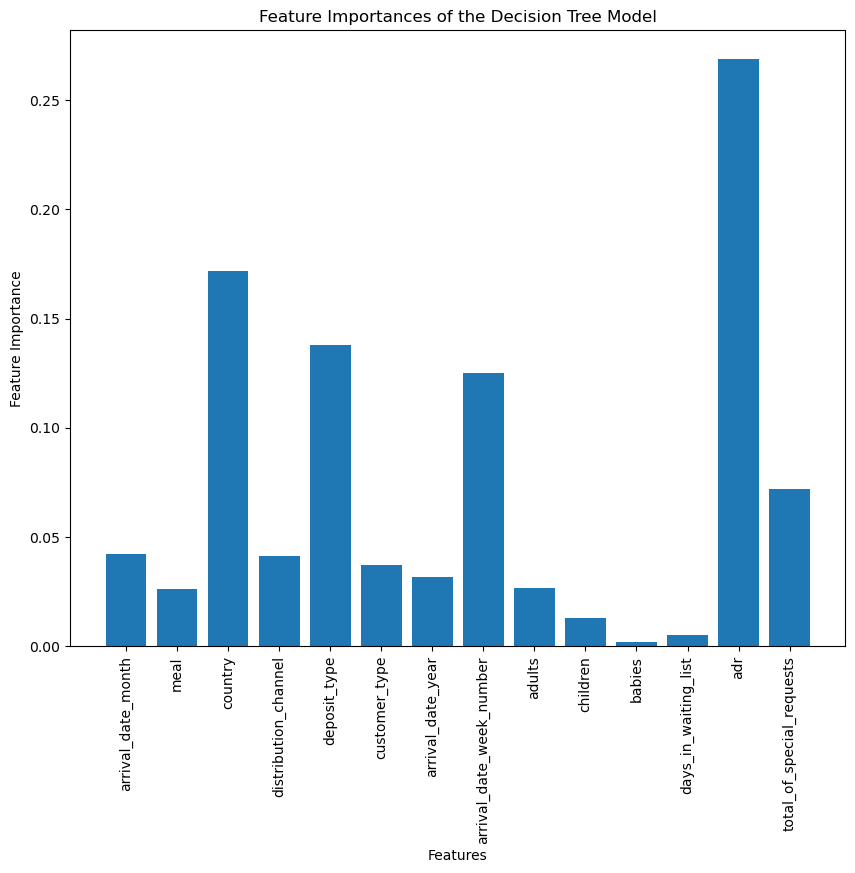

In [110]:
# Make an explanatory plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, RF.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree Model')
plt.show()

In [111]:
# Is our Random Forest better than our logistic regression?
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  20043
False Positives:  2392
False Negatives:  3444
True Positives:  9938


In [112]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.8370606136750705
Precision:  0.8060016220600162
Recall:  0.7426393663129577
Sensitivity:  0.7426393663129577
F1 Score:  0.7730242688238954


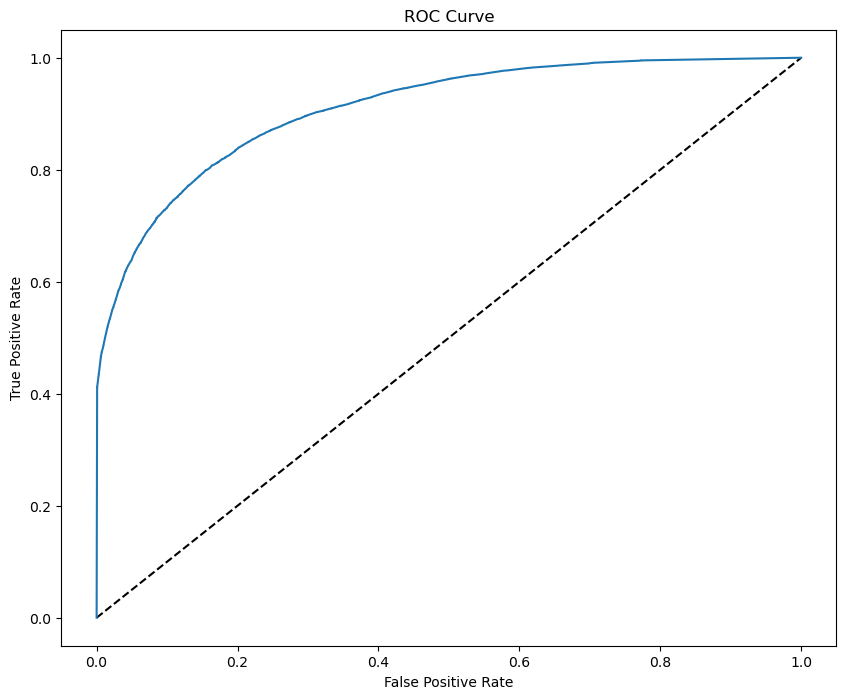

In [113]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = RF.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [114]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.9090981928663742


As an ensembling method of decision tree, random forest outweighs all the other models above in terms of every metrics.

------------

##### 6.Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=6110)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)

In [117]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7907139068040316
Confusion Matrix:
[[20780  1655]
 [ 5841  7541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     22435
           1       0.82      0.56      0.67     13382

    accuracy                           0.79     35817
   macro avg       0.80      0.74      0.76     35817
weighted avg       0.80      0.79      0.78     35817



In [118]:
print("Feature Importances: ", RF.feature_importances_)
print("Features: ", X_train.columns)

Feature Importances:  [0.04233813 0.02617613 0.17183465 0.04132855 0.13767051 0.03723802
 0.03155454 0.12489493 0.02656474 0.01268227 0.00184622 0.0051943
 0.26866359 0.07201343]
Features:  Index(['arrival_date_month', 'meal', 'country', 'distribution_channel',
       'deposit_type', 'customer_type', 'arrival_date_year',
       'arrival_date_week_number', 'adults', 'children', 'babies',
       'days_in_waiting_list', 'adr', 'total_of_special_requests'],
      dtype='object')


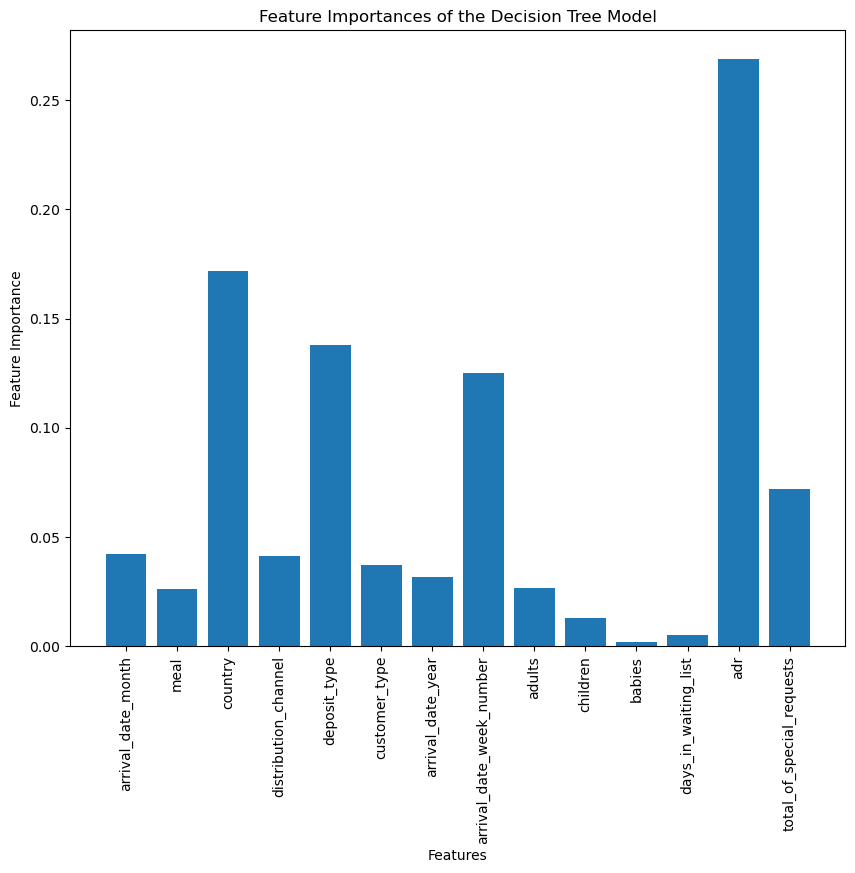

In [119]:
# Make an explanatory plot of the feature importances
plt.figure(figsize=(10, 8))
plt.bar(X_train.columns, RF.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree Model')
plt.show()

In [120]:
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)

True Negatives:  20780
False Positives:  1655
False Negatives:  5841
True Positives:  7541


In [121]:
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy:  0.7907139068040316
Precision:  0.8200304480208787
Recall:  0.5635181587206696
Sensitivity:  0.5635181587206696
F1 Score:  0.6679953937461245


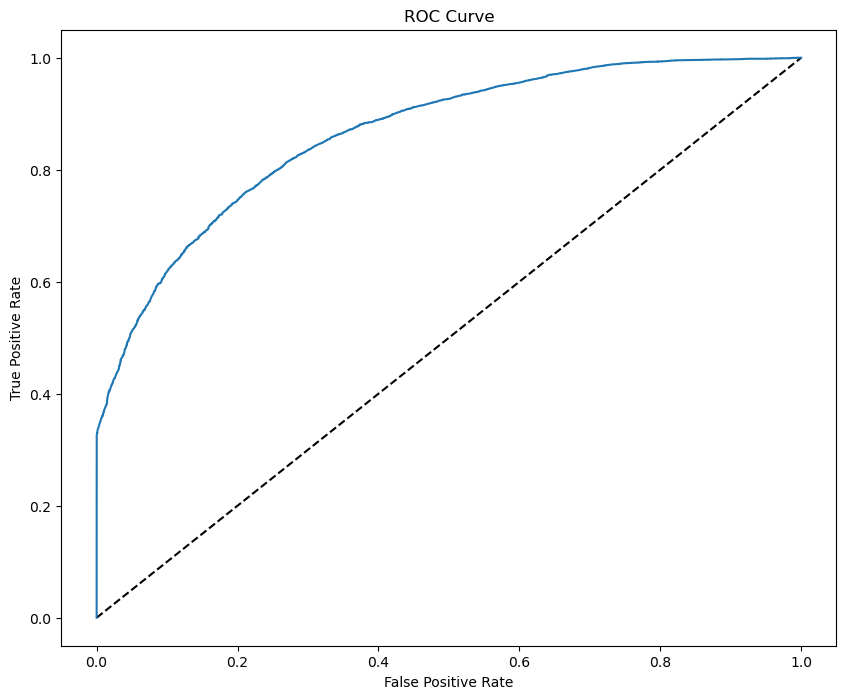

In [122]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = GB.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [123]:
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

AUC:  0.8644613374688072


The above model is fit using default hyperparameter values. We will use grid search to find the best hyperparameters of GBT.

In [124]:
# Create a GBT object
GBT = GradientBoostingClassifier()
# Create a dictionary of hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
# Create grid search
gridsearch = GridSearchCV(GBT, param_grid, cv=5, n_jobs=-1)

In [125]:
# Fit grid search
best_model = gridsearch.fit(X_train, y_train)
# View best hyperparameters
print('Best learning_rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])

Best learning_rate: 0.2
Best n_estimators: 200
Best max_depth: 7


In [126]:
# Make predictions using the testing set
y_pred = best_model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Print out the TP, FP, TN, FN values from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)
# the accuracy of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: ", accuracy)
# the precision of the model
precision = tp / (tp + fp)
print("Precision: ", precision)
# the recall of the model
recall = tp / (tp + fn)
print("Recall: ", recall)
# the sensitivity of the model
sensitivity = tp / (tp + fn)
print("Sensitivity: ", sensitivity)
# the F1 score of the model
f1_score = 2 * precision * recall / (precision + recall)
print("F1 Score: ", f1_score)

Accuracy: 0.8328168188290477
Confusion Matrix:
[[20359  2076]
 [ 3912  9470]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     22435
           1       0.82      0.71      0.76     13382

    accuracy                           0.83     35817
   macro avg       0.83      0.81      0.82     35817
weighted avg       0.83      0.83      0.83     35817

True Negatives:  20359
False Positives:  2076
False Negatives:  3912
True Positives:  9470
Accuracy:  0.8328168188290477
Precision:  0.8201974709856227
Recall:  0.7076670153938126
Sensitivity:  0.7076670153938126
F1 Score:  0.759788189987163


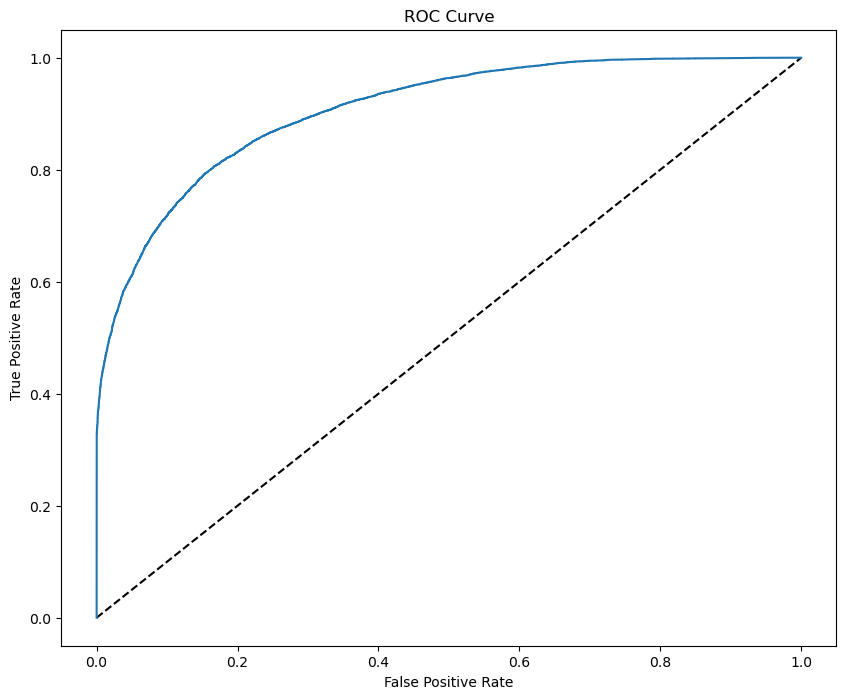

AUC:  0.9066324868764334


In [127]:
# Plot the ROC curve and calculate the AUC
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_pred_prob = best_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
# Compute and print AUC score
print("AUC: ", roc_auc_score(y_test, y_pred_prob))

##### Evaluation metrics for Random Forest model:

- Accuracy:  0.8370606136750705
- Precision:  0.8060016220600162
- Recall:  0.7426393663129577
- Sensitivity:  0.7426393663129577
- F1 Score:  0.7730242688238954

AUC score: 0.9090981928663742

##### Evaluation metrics for Gradient Boosting model:

- Accuracy:  0.8328168188290477
- Precision:  0.8201974709856227
- Recall:  0.7076670153938126
- Sensitivity:  0.7076670153938126
- F1 Score:  0.759788189987163

AUC score: 0.9066324868764334

The Gradient Boosting Tree method yields similar results to the random forest model. The accuracy, F1 score and AUC values are similar, while the random forest has a slightly higher recall and sensitivity value. However, to search for the best hyperparameter using grid search, the GBT is a much more time-consuming method(13m53.5s). Therefore, we prefer random forest over the GBT method.

##### In summary, Random Forest would be the best model for us.